# MRI QC Summary Statistics

### Set paths and other parameters

In [118]:
# set paths
bids_dir = "/data/perlman/moochie/analysis/CARE/MRI_data_clean/"
session_flag = True # True if using Vx, V1, V2, etc., else False
participant_num_len = 5 # length of participant number

### Import any libraries we may need later

In [119]:
import os, shutil
import sys
from os.path import join
from glob import glob
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Build the paths to relevant directories, and load MRI QC output from any potential functional folders

In [120]:
mriqc_dir = join(bids_dir, "derivatives", "MRIQC")

if not os.path.isdir(mriqc_dir):
    print("error with dir, no mriqc output found")

In [134]:
mriqc_dir

'/data/perlman/moochie/analysis/CARE/MRI_data_clean/derivatives/MRIQC'

In [140]:
globfold = join(mriqc_dir, "sub-*")
if session_flag is True:
    globfold = join(globfold, "ses-*")
globfold = join(globfold, "func")
sub_jsons = glob(join(globfold, "*.json"))

data = {}

for fname in sub_jsons:
    try:
        f = open(fname)
        ses = os.path.basename(fname).strip("sub-")[:participant_num_len+6]
        data[ses] = json.load(f)
    except:
        print("There was an error with filename:", fname, ". Skipping.")
        continue
    
print("There were", len(glob(globfold)), "functional sessions found in MRIQC out, and", len(sub_jsons), ".json files loaded in.")

There were 70 functional sessions found in MRIQC out, and 70 .json files loaded in.


In [141]:
print(list(data[ses].keys()))

['aor', 'aqi', 'bids_meta', 'dummy_trs', 'dvars_nstd', 'dvars_std', 'dvars_vstd', 'efc', 'fber', 'fd_mean', 'fd_num', 'fd_perc', 'fwhm_avg', 'fwhm_x', 'fwhm_y', 'fwhm_z', 'gcor', 'gsr_x', 'gsr_y', 'provenance', 'size_t', 'size_x', 'size_y', 'size_z', 'snr', 'spacing_tr', 'spacing_x', 'spacing_y', 'spacing_z', 'summary_bg_k', 'summary_bg_mad', 'summary_bg_mean', 'summary_bg_median', 'summary_bg_n', 'summary_bg_p05', 'summary_bg_p95', 'summary_bg_stdv', 'summary_fg_k', 'summary_fg_mad', 'summary_fg_mean', 'summary_fg_median', 'summary_fg_n', 'summary_fg_p05', 'summary_fg_p95', 'summary_fg_stdv', 'tsnr']


### Which MRIQC metric is being queried? (Variable of Interest)

In [142]:
d = {}

In [143]:
# enter metrics in this list
VoIs = [
    "fd_mean",
    "fd_perc",
    "snr",
    "tsnr",
    "aor",
    "aqi",
]

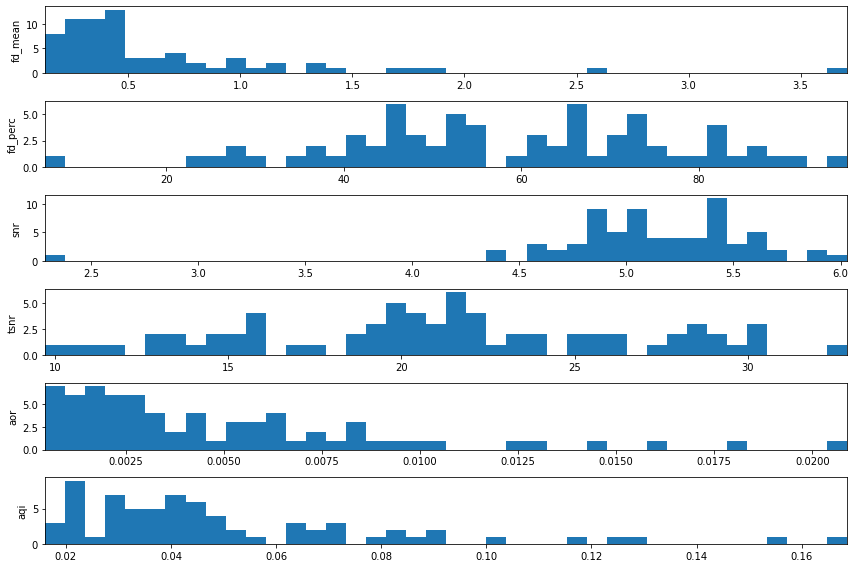

In [145]:
fig, axs = plt.subplots(nrows=len(VoIs), ncols=1, tight_layout=True)
fig.set_figheight(8)
fig.set_figwidth(12)

for i, var in enumerate(VoIs):
    
    d[var] = {}
    
    for ses in list(data.keys()):
        try:
            
            d[var][ses] = data[ses][var]
        except:
            print("Error adding session:", ses, ". Skipping.")
            continue
        
    vardata = np.array([d[var][ses] for ses in list(d[var].keys())])
    axs[i].hist(
        vardata,
        bins=40)
    axs[i].set_ylabel(var)
    axs[i].set_xlim((min(vardata), max(vardata)))

In [148]:
print(
    [sub for sub in list(d['fd_perc'].keys()) \
        if d['fd_perc'][sub] > 90])

['50261_ses-0', '50081_ses-1']


### Also read in HTML files where actual tables are stored

In [95]:
htmls = glob(join(mriqc_dir, "*.html"))

In [98]:
for html in htmls[:1]:
    df = pd.read_html(html)

In [115]:
df[0]

,0,1,2,3
0,aor,aor,aor,0.001454
1,aqi,aqi,aqi,0.029837
2,dummy_trs,dummy_trs,dummy_trs,0.000000
3,dvars,nstd,nstd,45.268514
4,dvars,std,std,1.125601
5,dvars,vstd,vstd,0.956897
6,efc,efc,efc,0.461773
7,fber,fber,fber,38223.945312
8,fd,mean,mean,0.251287
9,fd,num,num,882.000000
